In [17]:
# PCA example using Python

import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [18]:
genes = ['gene' + str(i) for i in range(1,101)]

wt = ['wt' + str(i) for i in range(1,6)]
ko = ['ko' + str(i) for i in range(1,6)]

data = pd.DataFrame(columns=[*wt, *ko], index = genes)

for gene in data.index:
    data.loc[gene, 'wt1': 'wt5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)
    data.loc[gene, 'ko1': 'ko5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)

print(data.head())
print(data.shape)

       wt1  wt2  wt3  wt4  wt5  ko1  ko2  ko3  ko4  ko5
gene1  979  921  888  860  941  418  435  366  409  412
gene2  180  174  152  175  145  625  641  584  617  608
gene3  986  942  932  959  923  129  176  154  151  177
gene4  766  810  805  757  743  852  811  797  838  799
gene5  588  611  577  597  593  340  346  395  350  366
(100, 10)


In [19]:
scaled_data = preprocessing.scale(data.T)

pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

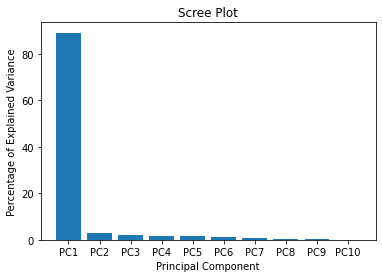

In [20]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC'+str(x) for x in range(1,len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

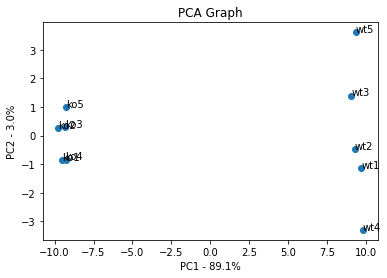

In [21]:
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns = labels)

plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
    
plt.show()

In [22]:
loading_scores = pd.Series(pca.components_[0], index=genes)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)

top_10_genes = sorted_loading_scores[0:10].index.values
print(loading_scores[top_10_genes])

gene67   -0.105924
gene86    0.105887
gene3     0.105860
gene11   -0.105858
gene63    0.105850
gene60   -0.105846
gene33   -0.105835
gene27   -0.105828
gene88    0.105827
gene99    0.105820
dtype: float64
